dict_keys(['2021-November', '2021-October', '2021-September', '2021-August', '2021-July', '2021-June', '2021-April', '2021-March', '2021-February', '2020-December', '2020-November', '2020-October', '2020-August', '2020-July', '2020-May', '2019-October', '2019-August', '2019-July', '2019-June', '2019-May', '2019-April', '2019-March', '2018-December', '2018-November', '2018-March', '2017-December', '2017-November', '2017-October'])
[5, 4, 5, 7, 2, 2, 1, 3, 6, 1, 1, 4, 4, 3, 3, 1, 2, 7, 10, 3, 3, 1, 13, 14, 2, 1, 16, 33]


<AxesSubplot:xlabel='new_dates'>

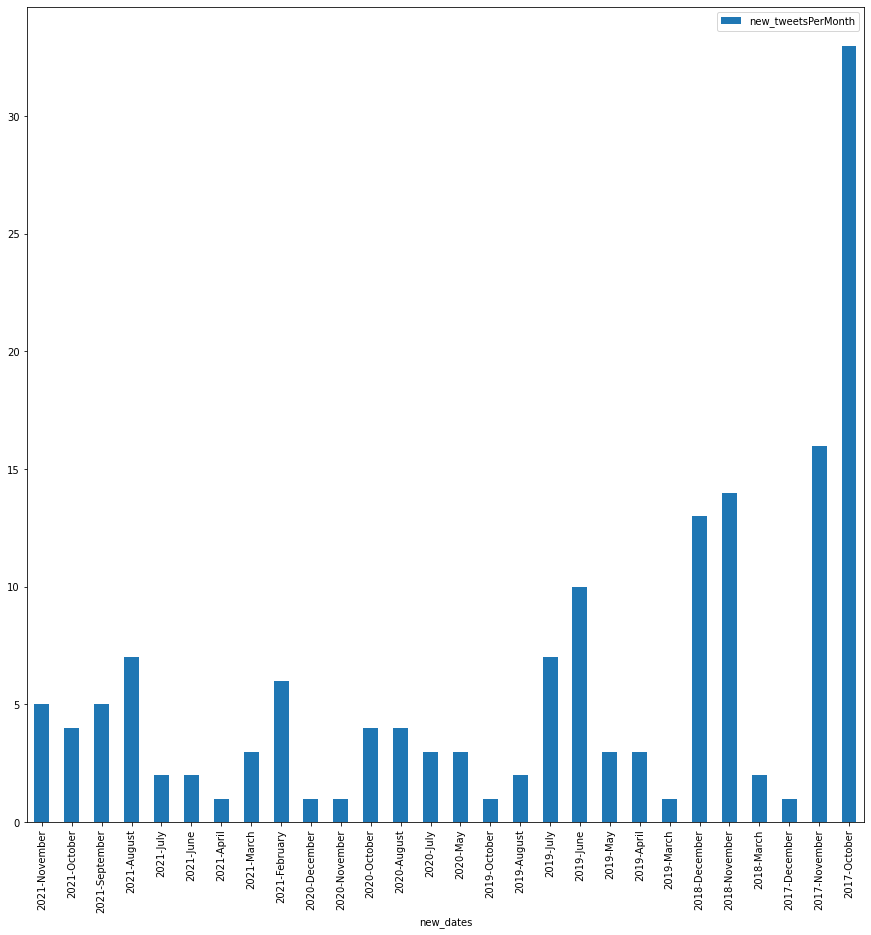

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dateutil

# Using OS library to call CLI commands in Python
listOfJournos = ["ferdi_ayi", "khalafroula", "bradleyhope", "Khadija_Ismayil", "svaradarajan", 
                 "edwyplenel", "panyiszabolcs", "YuririaSierra", "Bagiruwubusa", "aristeguicnn", "vijaita", "paranjoygt", 
                 "aboubakrj", "LenaBred", "mkvenu1", "turankislakci", "Rosamoussaoui", "mariamoukrim", "jorgecarrascoa", 
                 "bainjal", "alexsicairosr", "Smita_Sharma", "xanic", "icembrero", "SushantSin", "MarocAmar", "marcelaturati", 
                 "carloskeiths", "ricardomraphael", "iftikhargilani", "JasurSumerinli", "rohini_sgh", "lhan55", "alvaro_delgado"]

#for journo in listOfJournos:
#for journo in listOfJournos:

journo = "ferdi_ayi"
os.system("snscrape --jsonl --since 2015-01-01 twitter-search \"from:" + journo + " until:2021-12-2\" > " + journo + "-query-tweets.json")

# Reads the json generated from the CLI commands above and creates a pandas dataframe
journo_tweets_df = pd.read_json(journo + '-query-tweets.json', lines=True)

newDateFormat = {}.fromkeys(['date'], [])
for timestamp in journo_tweets_df['date']:
    newDateFormat['date'].append(str(timestamp.year) + '-'+ timestamp.month_name())

journo_tweets_df['date'] = newDateFormat['date']

new_dates = journo_tweets_df.groupby(['date'], sort=False).groups.keys()
new_tweetsPerMonth = []

for tweetsPerMonth in journo_tweets_df.groupby(['date'], sort=False).groups.values():
    new_tweetsPerMonth.append(len(tweetsPerMonth))

new_df = pd.DataFrame({'new_dates': new_dates,
                   'new_tweetsPerMonth': new_tweetsPerMonth})

new_df.set_index(new_df['new_dates'], inplace=True)

print(new_dates)
print(new_tweetsPerMonth)

new_df.plot.bar(x='new_dates', y='new_tweetsPerMonth', figsize=(15, 15))